# Ensemble Methods

We end our discussion of classification with a deeper discussion of ensemble learning.

## What You'll Accomplish

In particular you'll learn about the following ensemble methods:
<ul>
    <li>Voting Methods,</li>
    <li>Bagging,</li>
    <li>Pasting,</li>
    <li>Boosting.</li>
</ul>

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Reminding Ourselves About Ensemble Learners

We introduced the concept of ensemble learning with Random Forests. Recall that the idea is we take an assortment of prediction algorithms (this can be done for classification or regression) that perform pretty well then take a sort of average of their outputs to get your final answer. 

These methods often outperform even the best single algorithm, and were famously used in the winning solution to the netflix prize competition, <a href="https://netflixprize.com/">https://netflixprize.com/</a>.

### Voting Classifiers

Let's say that you have a few different classifiers that you think are pretty good, for instance a logistic regression model, a knn model, a support vector machine, and a random forest model.

A voting classifier is one that looks at how each of your classifiers decides to classify a point and goes with the decision that receives the most "votes".

Let's see how to implement this with the moons dataset.

In [2]:
from sklearn.datasets import make_moons

In [3]:
X_train,y_train = make_moons(n_samples=5000, shuffle=True, noise=.3, random_state=614)
X_test,y_test = make_moons(n_samples=1000, shuffle=True, noise=.3, random_state=614)

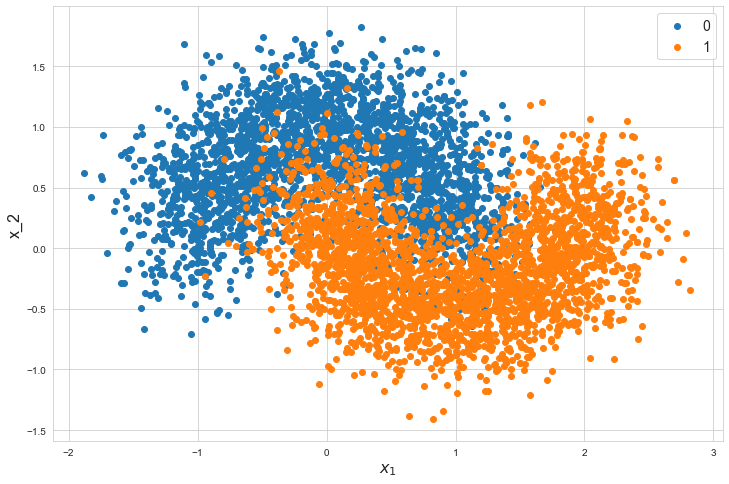

In [4]:
plt.figure(figsize = (12,8))

plt.scatter(X_train[y_train == 0, 0],X_train[y_train == 0,1],label="0")
plt.scatter(X_train[y_train == 1, 0],X_train[y_train == 1,1],label="1")

plt.legend(fontsize=14)

plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("x_2", fontsize=16)

plt.show()

In [5]:
# import our classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# The VotingClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
# Make Models each 
log_clf = LogisticRegression(solver='lbfgs')
rf_clf = RandomForestClassifier()
svm_clf = SVC(gamma="auto")
knn_clf = KNeighborsClassifier()

In [23]:
# make the voting classifier
# it is very similar to a pipeline's syntax
voting_clf = VotingClassifier(
                [('lr',log_clf),
                ('rf',rf_clf),
                ('svm',svm_clf),
                ('knn',knn_clf)],
                voting = "hard")

In [24]:
# fit the classifier
voting_clf.fit(X_train,y_train)

/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini'...
                                  coef0=

In [25]:
# print each classifier's accuracy
for name,clf in (["log_clf",log_clf],["rf_clf",rf_clf],
                 ["svm_clf",svm_clf],["knn_clf",knn_clf],
                 ["voting_clf",voting_clf]):
    # fit the model
    clf.fit(X_train,y_train)
    
    # predict
    y_pred = clf.predict(X_test)
    
    # get acc
    acc = sum(y_test == y_pred)/len(y_pred)
    
    print(name, np.round(acc,5))
    

log_clf 0.494
rf_clf 0.588


/Users/neutrino/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


svm_clf 0.659
knn_clf 0.63
voting_clf 0.638


### Bagging and Pasting

Remember we introduced these concepts in the random forest section. The way these work is instead of training separate classifiers on the same data set we train the same kind of classifier on different data sets.

This is done by randomly sampling our training data to simulate a new draw of training data. When that sampling is done <i>with replacement</i> this is known as <i>bagging</i>, which is short for bootstrap aggregating. When sampling is performed <i>without replacement</i> it is called <i>pasting</i>. 

Similar to the language of `VotingClassifier`, `sklearn` offers `BaggingClasifier` to build both pasting and bagging models.

In [10]:
from sklearn.ensemble import BaggingClassifier

In [11]:
from sklearn.datasets import make_circles

In [12]:
X_train,y_train = make_circles(n_samples=5000, shuffle=True, noise=.2, random_state=614)
X_test,y_test = make_circles(n_samples=1000, shuffle=True, noise=.2, random_state=614)

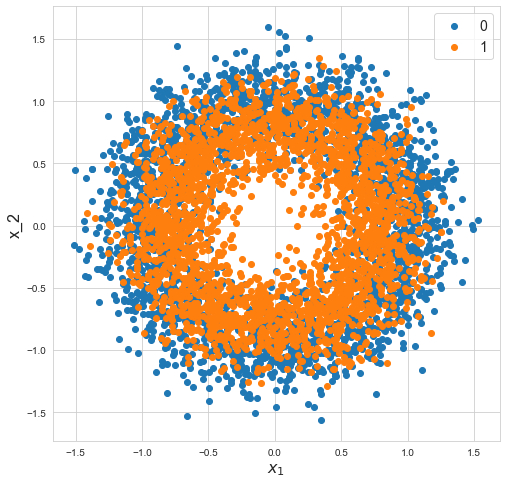

In [13]:
plt.figure(figsize = (8,8))

plt.scatter(X_train[y_train == 0, 0],X_train[y_train == 0,1],label="0")
plt.scatter(X_train[y_train == 1, 0],X_train[y_train == 1,1],label="1")

plt.legend(fontsize=14)

plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("x_2", fontsize=16)

plt.show()

In [14]:
# Let's use a knn classifier
# if bootstrap = True we use bagging
# if bootstrap = False it is pasting
# n_estimators is how many models we fit
# max_samples is the number of training points sampled
bag_clf = BaggingClassifier(KNeighborsClassifier(20),
                            n_estimators = 1000,
                            max_samples = 1000,
                            bootstrap = True
                           )


# Let's use a knn classifier
# if bootstrap = True we use bagging
# if bootstrap = False it is pasting
# n_estimators is how many models we fit
# max_samples is the number of training points sampled
paste_clf = BaggingClassifier(KNeighborsClassifier(20),
                            n_estimators = 1000,
                            max_samples = 1000,
                            bootstrap = False
                           )

In [15]:
# We'll compare it to a single knn
knn = KNeighborsClassifier(20)

In [37]:
# Fit knn
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("KNN Accuracy", np.round(acc,5))

# Fit Bagged Data
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("Bagging Accuracy", np.round(acc,5))

# Fit Paste Data
paste_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

acc = sum(y_test == y_pred)/len(y_pred)

print("Pasting Accuracy", np.round(acc,5))

KNN Accuracy 0.649
Bagging Accuracy 0.67
Pasting Accuracy 0.67


### Practice

#### The MNIST dataset

The MNIST dataset is a database of $60,000$ handwritten digits. It has been used to help create computer vision algorithms in detecting handwritten digits. It is also a common dataset used when teaching classification. Many books and course have already introduced the algorithm at this point in their course, so we're a bit behind the curve.

In this breakout session you're going to build an ensemble method to classify instances as being a digit of your choice. First I'll go through the data set with you, you'll choose your favAorite integer $0$-$9$, then get to work building an algorithm. Use one of voting classifiers, bagging, or pasting. Also instead of using accuracy try to use precision as a performance measure.

In [26]:
# This loads the data
from sklearn.datasets import load_digits

In [27]:
# load in the data
X, y = load_digits(n_class=10, return_X_y=True)
images = load_digits()['images']

In [28]:
# This data set only has a 
# small sample of the 60,000
# digits

# Each row is an image, and each column
# is the value for an 8x8 grid
np.shape(X)

(1797, 64)

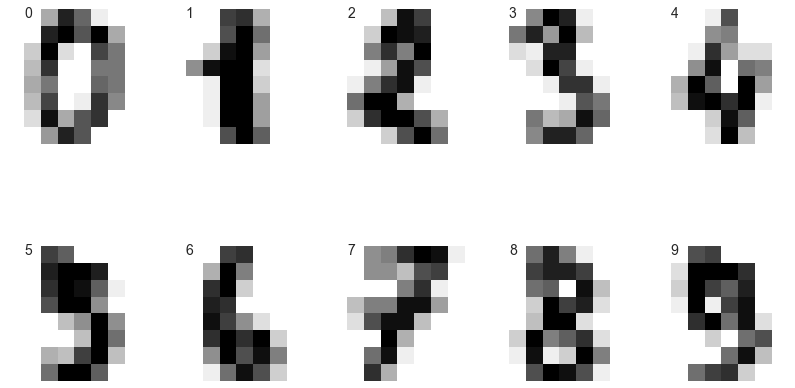

In [29]:
# show some samples for each
# digit
fig,ax = plt.subplots(2,5,figsize=(14,8))

for i in range(0,10):
    ax[i//5,i%5].set_axis_off()
    ax[i//5,i%5].imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax[i//5,i%5].text(.5,0,i,fontsize=14)

plt.show()

In [51]:
## Okay now choose a digit as a target
## then make a new vector from y
## where all instances of your digit are labeled as 1
## and all other instances all 0
y_target = np.multiply(y, np.where(y!=5, 0, 1))


In [54]:
## Now build your train test set
## Remember to set a random_state
## and remember to stratify

#Here I'll need to use kfold to stratify my data and get the train and test subsets

In [53]:
## Build your classification model here
## choose either a voting model
## a bagging model
## or a pasting model

# Let's use a knn classifier
# if bootstrap = True we use bagging
# if bootstrap = False it is pasting
# n_estimators is how many models we fit
# max_samples is the number of training points sampled
bag_clf = BaggingClassifier(KNeighborsClassifier(20),
                            n_estimators = 1000,
                            max_samples = 1000,
                            bootstrap = True
                           )


In [ ]:
## Additional code here if needed
#Make a loop that 


In [ ]:
## Additional code here if needed




In [ ]:
## Additional code here if needed





#### Bagging vs Pasting

Bagging tends to have higher bias than pasting. This is due to the `bootstrap=True` setting. Bootstrapping leads to a greater diversity in the subsets each predictor is trained on, making it slightly harder to detect the true pattern in the data. However, this also means that predictors tend to be less correlated leading to reduced variance when compared to pasting.

Overall it has been found that bagging builds better models than pasting, so it is the preferred approach. If you have the time and computing resources you can perform CV to see which works best for your data.

### Boosting 

Boosting is a very powerful algorithm and is one of the techniques utilized in a number of winning Kaggle Projects. The theory behind the algorithm is based on the concepts of <i>weak learners</i> and <i>strong learners</i> from the subfield in Statistical Learning on <i>PAC learnability</i>, here PAC stands for <a href="https://en.wikipedia.org/wiki/Probably_approximately_correct_learning">Probably Approximately Correct</a>. We touch lightly on the theory here now.

#### Weak Learner vs Strong Learner

A statistical learning algorithm is referred to as <i>weak learner</i> if it does slightly better than random guessing.

A statistical learning algorithm is called a <i>strong learner</i> if it can be made arbitrarily close to the true relationship.

Making a weak learner is much much easier than producing a strong learner in general, however, it has been shown that if a problem is weak learnable than it is stong learnable (meaning that a strong learner exists). The fact that one exists led to the creation of algorithms and techniques to produce a strong learner. This is where boosting comes into play.

#### Many Weak Learners

The idea for boosting is that we take an ensemble of weak learners and <a href="https://www.youtube.com/watch?v=mmbuD0IEvuA">with their power combined</a> we produce a strong learner.

We'll introduce a single boosting algorithm developed by Freund and Schapire (1997).

### AdaBoost

AdaBoost is short for adaptive boosting. The concept is to train a series of weak learners, with each subsequent predictor paying more attention to training instances that were misclassified by its predecessors. Each generation of weak learner focuses more and more on the hard to classify observations.

Let's see demonstrate this process, once again using the moons data. We'll use AdaBoost with a Decision Stump (a decision tree with depth$=1$) as the weak learner. We plot the AdaBoost decsion boundaries as we increase the number of weak learners used in the algorithm.

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
X_train,y_train = make_moons(n_samples=100, shuffle=True, noise=.3, random_state=614)
X_test,y_test = make_moons(n_samples=50, shuffle=True, noise=.3, random_state=614)

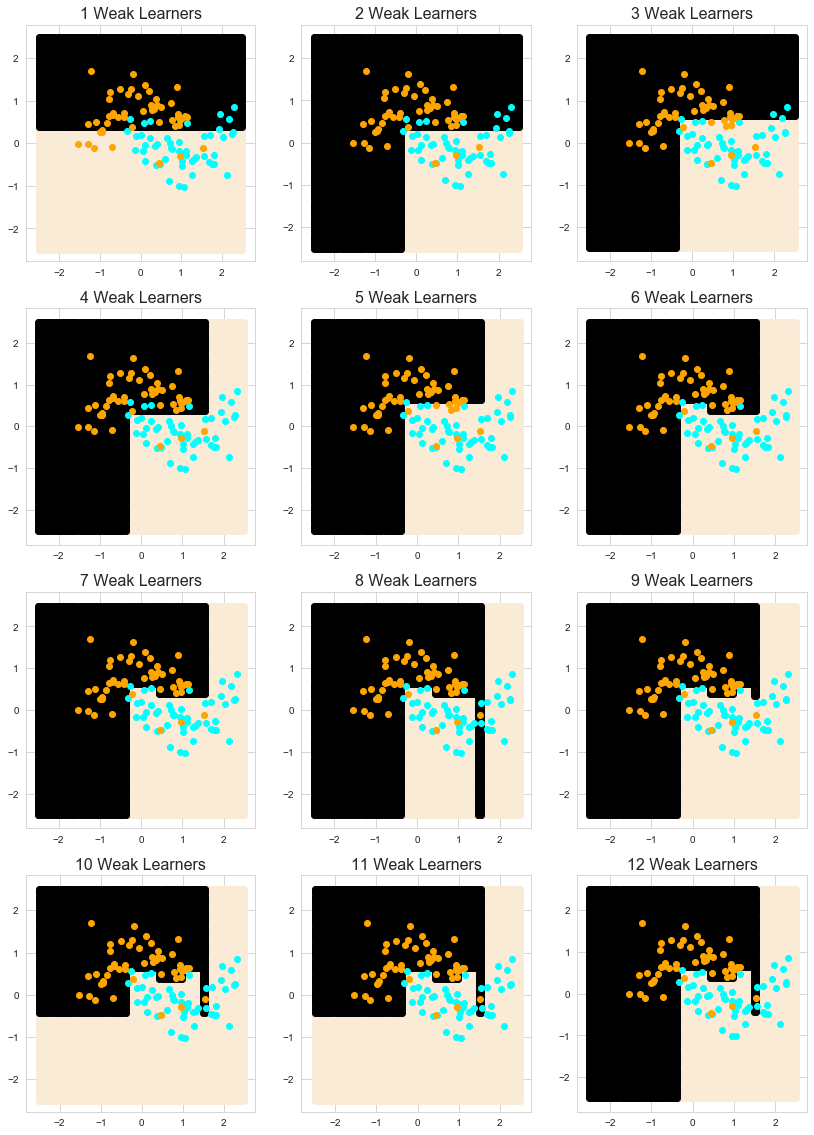

In [57]:
fig,ax = plt.subplots(4,3, figsize=(14,20))

j = 0
for i in range(1,13):
    # n_estimators controls how many weak learners we use
    # learning_rate is a hyperparameter that controls how
    # aggressively we correct incorrect labels
    # algorithm is the algorithm that sklearn runs to fit the model
    # SAMME.R or SAMME are the options, SAMME.R allows calculation
    # of probabilities.
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                n_estimators = i,
                algorithm="SAMME.R",
                learning_rate = 0.5
            )
    
    ada_clf.fit(X_train, y_train)
    
    x1 = np.linspace(-2.5,2.5,100)
    x2 = np.linspace(-2.5,2.5,100)

    x1v, x2v = np.meshgrid(x1,x2)

    X_grid = np.concatenate([x1v.reshape(-1,1),x2v.reshape(-1,1)],axis=1)

    pred_grid = pd.DataFrame(np.concatenate([X_grid,ada_clf.predict(X_grid).reshape(-1,1)],axis=1),
                             columns = ['x1','x2','y'])
    
    ax[j//3,j%3].scatter(pred_grid.loc[pred_grid.y == 1,'x1'],pred_grid.loc[pred_grid.y == 1,'x2'],
           c='antiquewhite', label="Predicted 1")
    ax[j//3,j%3].scatter(pred_grid.loc[pred_grid.y == 0,'x1'],pred_grid.loc[pred_grid.y == 0,'x2'],
               c='black', label="Predicted 0")
    
    ax[j//3,j%3].scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],c = "cyan",label="Training 1")
    ax[j//3,j%3].scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],c = "orange",label="Training 0")
    
    ax[j//3,j%3].set_title(str(i) + " Weak Learners", fontsize=16)

    
    j = j+1


plt.show()

As you might notice when we increase the number of weak learners we use in the model we tend to overfit to training data. One way to control for this is to not use too many estimators. Where as always the correct number of estimators depends on the data you're fitting.

##### Gradient Boosting

Another popular boosting algorithm is gradient boosting. If you are interested in learning the algorithm check out the homework on Classification.

### Practice

Train an AdaBoost model on the MNIST data from earlier. Does it seem to outperform the model you fit earlier?

In [ ]:
## Code here




In [ ]:
## Additional code here if needed




In [ ]:
## Additional code here if needed




In [ ]:
## Additional code here if needed




### Which Model to Use?

As always this is a tough question and the answer depends on your data and computational capabilities.

#### Parallelizability

One advantage of voter methods, bagging, and pasting is that they can be written to be performed in parallel. This can significantly cut down on computing time.

This is not possible for Boosting methods because the algorithm explicitly requires the output from the first weak learner to fit the second weak learner and so on. However, one advantage of the boosting approach is that the weak learners within the ensemble may be quicker to fit than the ensemble models in the voter, bagging, and pasting approaches.

## Class is Out

That's it for classification! Up next is unsupervised learning.

### Additional Ensemble Learning References

<a href = "https://link.springer.com/content/pdf/10.1007/BF00058655.pdf">Bagging Predictors</a> by Leo Breiman

<a href = "https://link.springer.com/article/10.1023/A:1007563306331">Pasting small votes for classification in large databases and on-line</a> by Leo Breiman

<a href = "http://rob.schapire.net/papers/Schapire99c.pdf">A Brief Introduction to Boosting</a> by Robert E. Schapire

<a href = "https://mitpress.mit.edu/books/boosting">Boosting</a> by  Robert E. Schapire and Yoav Freund

<a href = "https://www.csie.ntu.edu.tw/~mhyang/course/u0030/papers/schapire.pdf">A Boosting Tutorial</a> by Robert E.  Schapire